# Interactive Analysis at the Speed of Thought

## Malcolm Ramsay
### github.com/malramsay64/interactive-visualisation

The most exciting phrase in science is not Eureka!
But that's funny...
This famous quote attributed to Isaac Asimov
is truly representative of much of the research we perform.
The truly interesting results
arise from what we don't yet understand.

Once we do notice something weird
the first step is normally thinking
that there must be something wrong with our data.

The best methods we have for understanding data is visualisations,
where a picture truly can say a thousand words.
However, there are times where you need an an entire book.
Interactive visualisations allow you to dig deeper
and ask questions as you think of them,
and making sense of a large amount of data.

##  Zooming and Panning

The simplest method of interacting with data
is plotting all of it
then zooming in on an area of interest.
This allows for both an overview of the big picture
while still allowing a microscopic view of certain areas.

I am using python so these exmples are all in python,
however there is going to be something similar
in any other language you choose to use.

In [1]:
# The imports for each example are separated
# to help indicate what's requried for each.
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Read in data file
mpl_df = (
    pd.read_hdf("data/dynamics_clean_agg.h5", "dynamics")
    .query("temperature==1.40 and pressure==13.50")
)

For those of you using python,
you are probably using matplotlib for visualisation.
With some setup,
namely adding the `%matplotlib widget` magic
you get interactivity in the notebook.
Allowing that quick view of the data.

In [17]:
%matplotlib widget
plt.scatter(mpl_df["time"], mpl_df["msd_value"])

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [4]:
import altair as alt

# This allows you to use more than 5000 rows of a dataframe
alt.data_transformers.enable("json")
# Render altair in a jupyter notebook
alt.renderers.enable('notebook')

# define the theme by returning the dictionary of configurations
def large():
    return {
        'config': {
            'view': {
                'height': 600,
                'width': 800,
            },
        }
    }

alt.themes.register("large", large)
alt.themes.enable("large")

ThemeRegistry.enable('large')

In [5]:
# Read in data file for altair
df = pd.read_hdf("data/dynamics_clean_agg.h5", "dynamics")

In [6]:
log_scale = alt.Scale(type="log")
altair_chart = alt.Chart(df.query("pressure==13.50")).mark_point().encode(
    x=alt.X("time", scale=log_scale),
    y=alt.Y("msd_value", scale=log_scale),
    color="temperature:N",
)

In addition to matplotlib there are a range of other tools
which uses the web browser
to enable a broader range of interactivity.
My personal favourite is Altair,
which provides a really nice interface for plotting data.
By default, you get a static figure,
however adding `.interactive()` enables interactivity.

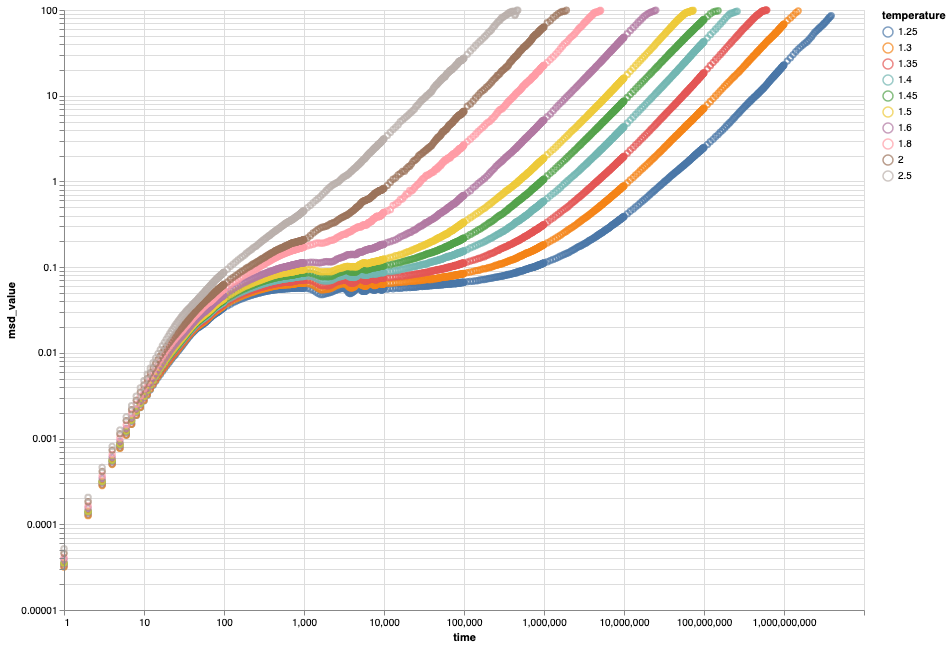

In [7]:
altair_chart

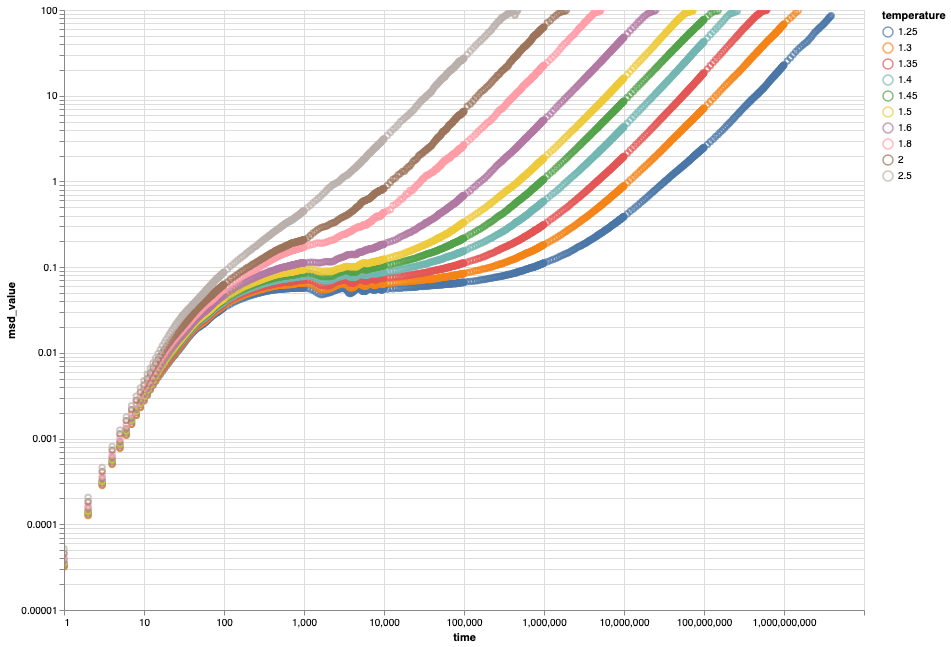

In [8]:
altair_chart.interactive()

In [9]:
from sdanalysis.figures import plot_frame, show, output_notebook
from sdanalysis.read import open_trajectory
output_notebook()

Loading BokehJS ...

Another example of this web based interactivity
is the Bokeh library.
Which is a little more powerful
in the types of visualisations you can generate,
and I am using it to visualise my Molecular Dynamics trajectories
because I can so easily get both the high level overview
yet still dive into each individual particle.

In [10]:
snap = next(open_trajectory("data/dataset/dump-Trimer-P13.50-T1.50-p2.gsd"))
show(plot_frame(snap))

## Interactive Analysis

All the examples so far have focused on a single figure,
what if we want to generate different figures,
or control what is generated.
The ipywidgets package provides this control.
Using a sine wave as an example,
we can move the slider to change the frequency,
updating the figure each time.

In [11]:
import ipywidgets
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams["figure.figsize"] = [12, 10]

In [20]:
%matplotlib inline 
plt.rcParams["figure.figsize"] = [12, 10]
@ipywidgets.interact(wavelength=(1, 10))
def plot_sine(wavelength=1):
    theta = np.linspace(0, 2*np.pi)
    return plt.plot(theta, np.sin(wavelength*theta))

interactive(children=(IntSlider(value=1, description='wavelength', max=10, min=1), Output()), _dom_classes=('w…

In [13]:
quantities = [column[:-6] for column in df.columns if "value" in column]

In [14]:
def plot_altair(quantity):
    x_scale = alt.Scale(type="log")
    y_scale = alt.Scale(type="linear")
    if quantity in ["msd"]:
        y_scale = alt.Scale(type="log")
    return alt.Chart(df.query("pressure==13.50")).mark_point().encode(
        x=alt.X("time", scale=x_scale),
        y=alt.Y(quantity+"_value", scale=y_scale),
        color="temperature:N"
    )

This interative control of a figure
can be combined with an interactive figure,
and now we can visualise a range of quantites
from many different data sets.
Rather than remembering the incantation
to generate the figure you want,
just have every possible figure at the click of a button.
You don't even need to remember the names of the columns
in your dataframe.

In [15]:
@ipywidgets.interact(quantity=quantities)
def plot_quantity(quantity):
    return plot_altair(quantity).interactive()

interactive(children=(Dropdown(description='quantity', options=('mean_displacement', 'msd', 'mfd', 'alpha', 's…

## Interactive Dashboards


For projects where you are performing
the same analysis over and over again
or you have some prelimiary analysis of your results.
You want something that is easy to access and use.
In these cases an interactive dashboard
can be worth the additional effort required to set up.
These dashboards allow a wide range of interactivity.
Here I can look at any frame from any of the simulations I have run,
and the best part is that I can run the server on the HPC doing the simulations,
so I don't even need to transfer the large datafiles to begin my analysis.
This is a Bokeh Server application all running python code
and the best bit is,
because I am writing in python,
I can use any of the python libraries to perform analysis,
like using a machine learning algorithm to detect crystals,
with no pre-processing.

The slides and all the code is available on my github profile.

In [16]:
# Code to start interactive dashboard
# !sdanalysis figure -m models/knn-trimer.pkl --directory data/dataset/

## github.com/malramsay64/interactive-visualisation

[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/malramsay64/interactive-visualisation/master?filepath=interactive.ipynb)